<a href="https://colab.research.google.com/github/josedandrade/pliafinanzas/blob/main/Intro_Web_Sem%C3%A1ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizar grafo de Turtle utilizando JSON-LD
Para convertir Turtle a JSON-LD en Python, podemos utilizar la biblioteca rdflib.

Para visualizar el grafo de conocimiento en Google Colab, puedes usar la biblioteca rdflib junto con pyvis para crear una visualización interactiva. Primero, asegúrate de instalar la biblioteca pyvis ejecutando el siguiente comando en una celda de código de Colab:

In [ ]:
!pip install rdflib
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00


La ejecución del código debajo crea un gráfico de un triplet.

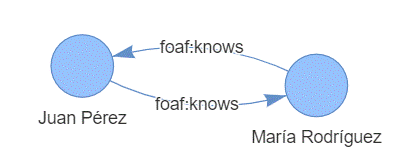

Ejecutar para crear un RDF utilizando rdflib y cargar los datos del formato Turtle. Luego, se utiliza el módulo rdflib para convertir el gráfico RDF en una estructura JSON-LD y lo guarda en HTML para desplegar en la celda, o para descargar al ordenador.

In [ ]:
import rdflib
from pyvis.network import Network
import json

# Datos en Turtle
turtle_data = '''
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex: <http://example.org/> .

ex:Juan a foaf:Person ;
    foaf:name "Juan Pérez" ;
    foaf:givenName "Juan" ;
    foaf:familyName "Pérez" ;
    foaf:mbox <mailto:juan.perez@example.org> ;
    foaf:homepage <http://www.juanperez.com> ;
    foaf:knows ex:Maria .

ex:Maria a foaf:Person ;
    foaf:name "María Rodríguez" ;
    foaf:givenName "María" ;
    foaf:familyName "Rodríguez" ;
    foaf:mbox <mailto:maria.rodriguez@example.org> ;
    foaf:homepage <http://www.mariarodriguez.com> ;
    foaf:knows ex:Juan .
'''

# Crear un gráfico RDF y cargar los datos en Turtle
g = rdflib.Graph()
g.parse(data=turtle_data, format='turtle')

# Modificar el contexto al serializar el gráfico RDF en JSON-LD
custom_context = {
    "ex": "http://example.org/",
    "foaf": "http://xmlns.com/foaf/0.1/"
}
jsonld_data = g.serialize(format='json-ld', context=custom_context, auto_compact=True, indent=2)
jsonld_graph = json.loads(jsonld_data)

# Crear una visualización de red utilizando PyVis
net = Network(notebook=True, width='100%', height='400px', directed=True, bgcolor='#ffffff', cdn_resources='remote')

# Filtra el contexto 
for node in jsonld_graph['@graph']:
    net.add_node(node['@id'], label=node['foaf:name'])

for edge in jsonld_graph['@graph']:
    if 'foaf:knows' in edge:
        net.add_edge(edge['@id'], edge['foaf:knows']['@id'], label='foaf:knows')

# Ajustar la apariencia de la visualización
net.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=200, spring_strength=0.08, damping=0.4, overlap=0)

# Guardar la visualización de la red en la notebook
net.save_graph("graph.html")

from IPython.core.display import HTML

# Reemplaza 'archivo.html' con el nombre de tu archivo HTML
with open('graph.html', 'r') as f:
    html_content = f.read()

HTML(html_content)


Después de ejecutar el código, verás que se crea un archivo llamado graph.html. Para descargar este archivo en tu computadora local, ejecuta el siguiente código:

In [ ]:
from google.colab import files
files.download("graph.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>